# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [48]:
%reload_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np
from glob import glob
import re
from datetime import datetime
from trialexp.process.folder_org.utils import build_session_info, load_and_concat_dataset, filter_sessions

## Build dataframe containing the metadata of all sessions

In [49]:
# root_path = r'\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\*'

root_path = '/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/*/*'

df_session_info = build_session_info(root_path)
df_session_info

,animal_id,expt_datetime,session_id,task_name,path,session_no
0,JC316L,2022-12-11 20:26:00,JC316L-2022-12-11-202600,reaching_go_spout_bar_dual_all_reward_dec22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,2.0
1,JC317L,2022-12-09 17:19:26,JC317L-2022-12-09-171926,reaching_go_spout_bar_dual_all_reward_dec22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,1.0
2,JC317L,2022-12-11 20:26:00,JC317L-2022-12-11-202600,reaching_go_spout_bar_dual_all_reward_dec22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,2.0
3,JC316L,2022-12-09 17:19:25,JC316L-2022-12-09-171925,reaching_go_spout_bar_dual_all_reward_dec22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,1.0
4,kms051,2022-09-16 14:54:27,kms051-2022-09-16-145427,pavlovian_nobar_nodelay,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,11.0
...,...,...,...,...,...,...
435,kms049,2022-08-22 11:07:10,kms049-2022-08-22-110710,reaching_go_spout_cued_uncued,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,3.0
436,kms053,2022-09-27 14:12:56,kms053-2022-09-27-141256,reaching_go_spout_cued_uncued,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,11.0
437,kms047,2022-09-21 11:22:12,kms047-2022-09-21-112212,reaching_go_spout_cued_uncued,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,11.0
438,kms051,2022-08-25 16:15:18,kms051-2022-08-25-161518,reaching_go_spout_cued_uncued,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,6.0


## Loading data

- load the data given task name and session_id
- create function to calculate the task name and session_id from session_info

In [61]:
df_sel = filter_session(df_session_info, 'kms058', session_no=5, session_method='tail', task_name='reaching_go_spout_bar_nov22')
df_sel

,animal_id,expt_datetime,session_id,task_name,path,session_no
245,kms058,2023-03-20 13:26:58,kms058-2023-03-20-132658,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,21.0
320,kms058,2023-03-22 18:26:17,kms058-2023-03-22-182617,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,22.0
331,kms058,2023-03-23 19:17:40,kms058-2023-03-23-191740,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,23.0
212,kms058,2023-03-24 15:12:54,kms058-2023-03-24-151254,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,24.0
239,kms058,2023-03-25 18:40:34,kms058-2023-03-25-184034,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,25.0


In [53]:
paths = df_sel.path
ds_combined = load_and_concat_dataset(paths)

  0%|          | 0/15 [00:00<?, ?it/s]

/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms064-2023-03-06-105405/processed/xr_session.nc not found! skipping
Concating datasets...


In [54]:
ds_combined

<xarray.Dataset>
Dimensions:                            (trial_nb: 299, event_time: 120,
                                        session_id: 14)
Coordinates:
  * trial_nb                           (trial_nb) int64 1 2 3 4 ... 297 298 299
  * event_time                         (event_time) float64 -1.975e+03 ... 3....
  * session_id                         (session_id) object 'kms061-2023-03-10...
Data variables: (12/20)
    uid                                (session_id, trial_nb) object 'kms061_...
    trigger                            (session_id, trial_nb) object 'hold_fo...
    valid                              (session_id, trial_nb) float64 1.0 ......
    break_after_abort                  (session_id, trial_nb) float64 0.0 ......
    US_end_timer                       (session_id, trial_nb) float64 1.0 ......
    water_on                           (session_id, trial_nb) float64 1.0 ......
    ...                                 ...
    success                            (session_id, trial_nb) float64 1.0 ......
    hold_for_water_analog_1_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_analog_1_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_analog_1_df_over_f     (session_id, trial_nb, event_time) float64 ...
    busy_win                           (session_id, trial_nb) float64 nan ......
    busy_win_analog_1_df_over_f        (session_id, trial_nb, event_time) float64 ...

## Plot figures

<Axes: xlabel='event_time', ylabel='hold_for_water_analog_1_df_over_f'>

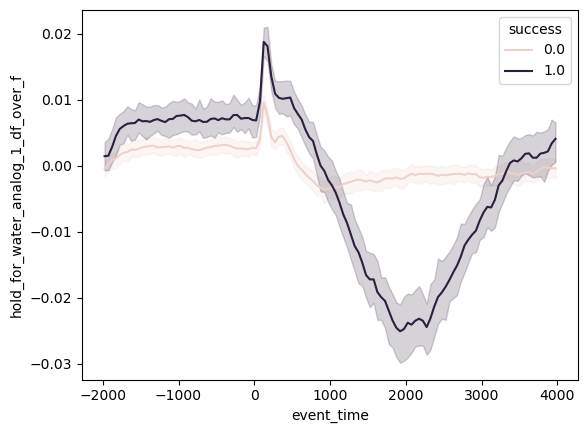

In [55]:
df2plot = ds_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', n_boot=100, data=df2plot)

<Axes: xlabel='event_time', ylabel='first_bar_off_analog_1_df_over_f'>

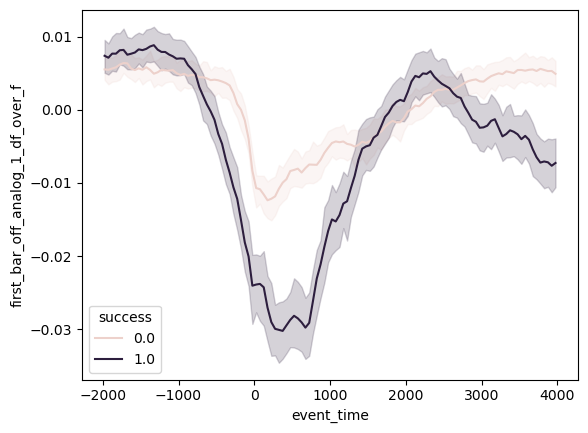

In [56]:
df2plot = ds_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f',n_boot=100,  data=df2plot)

<Axes: xlabel='event_time', ylabel='first_spout_analog_1_df_over_f'>

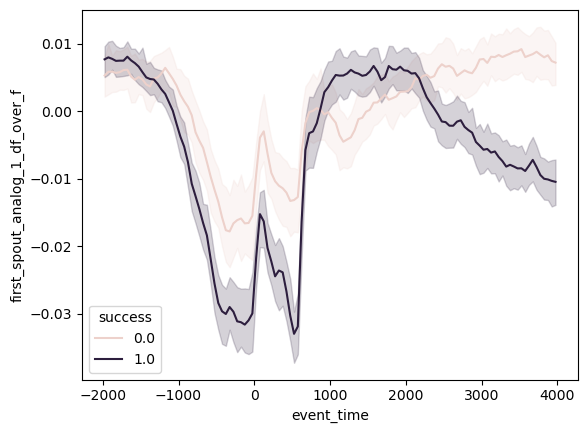

In [59]:
df2plot = ds_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f',n_boot=100,  data=df2plot)

### ACh

In [65]:
df_sel = filter_session(df_session_info, 'RE', session_no=3, session_method='tail', task_name='reaching_go_spout_bar_nov22')
df_sel


,animal_id,expt_datetime,session_id,task_name,path,session_no
326,RE603,2023-03-21 15:29:00,RE603-2023-03-21-152900,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,1.0
207,RE603,2023-03-24 08:39:53,RE603-2023-03-24-083953,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,2.0
243,RE603,2023-03-29 08:38:20,RE603-2023-03-29-083820,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,3.0
299,RE602,2023-03-20 14:56:14,RE602-2023-03-20-145614,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,4.0
256,RE602,2023-03-21 14:36:10,RE602-2023-03-21-143610,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,5.0
315,RE602,2023-03-22 12:14:14,RE602-2023-03-22-121414,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,6.0
221,RE604,2023-03-24 09:11:34,RE604-2023-03-24-091134,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,9.0
224,RE604,2023-03-27 09:12:07,RE604-2023-03-27-091207,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,10.0
219,RE604,2023-03-29 09:11:33,RE604-2023-03-29-091133,reaching_go_spout_bar_nov22,/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...,11.0


In [66]:
paths = df_sel.path
ds_ach_combined = load_and_concat_dataset(paths)

  0%|          | 0/9 [00:00<?, ?it/s]

Concating datasets...


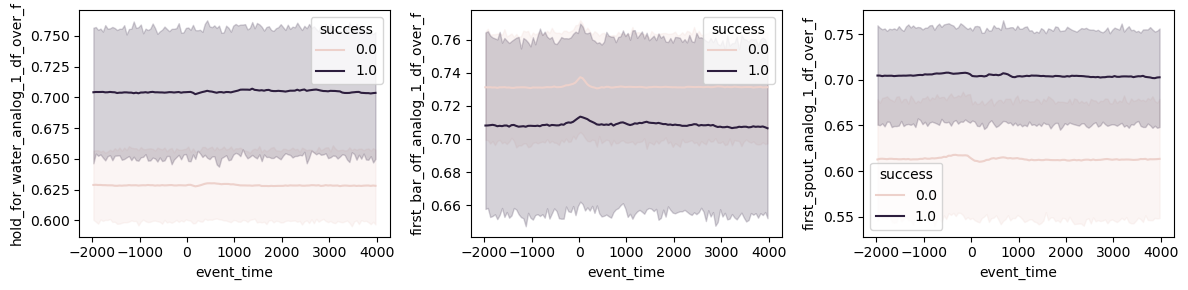

In [67]:
fig,ax = plt.subplots(1,3,figsize=(4*3,3))

df2plot = ds_ach_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', data=df2plot, ax=ax[0])

df2plot = ds_ach_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f', data=df2plot, ax=ax[1])

df2plot = ds_ach_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f', data=df2plot, ax=ax[2])

fig.tight_layout()